In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train=x_train/255.0
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test=x_test/255.0

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
y_train[0]

5

In [15]:
batch_size=60
num_classes=10
epochs=2

In [16]:
y_train=tf.one_hot(y_train.astype(np.int32),depth=10)
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)

In [17]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(28,28,1)),
tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
tf.keras.layers.MaxPool2D((2,2),strides=2),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(num_classes,activation='softmax')
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/2
1000/1000 [==============================] - 127s 125ms/step - loss: 0.1377 - acc: 0.9574 - val_loss: 0.0429 - val_acc: 0.9862
Epoch 2/2
1000/1000 [==============================] - 141s 141ms/step - loss: 0.0538 - acc: 0.9840 - val_loss: 0.0308 - val_acc: 0.9890


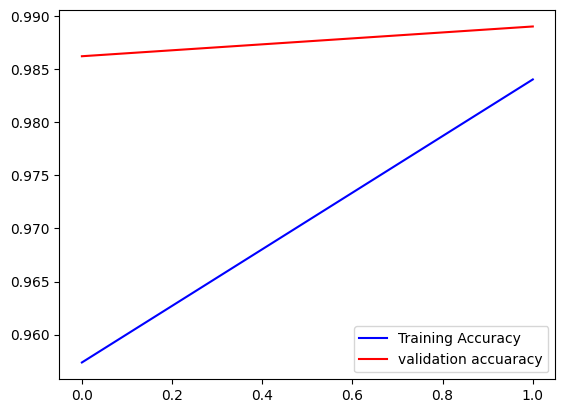

In [12]:
plt.plot(history.history['acc'],color='b',label='Training Accuracy')
plt.plot(history.history['val_acc'],color='r',label='validation accuaracy')
plt.legend()

In [13]:
y_pred=model.predict(x_test)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 5s 16ms/step


<Axes: >

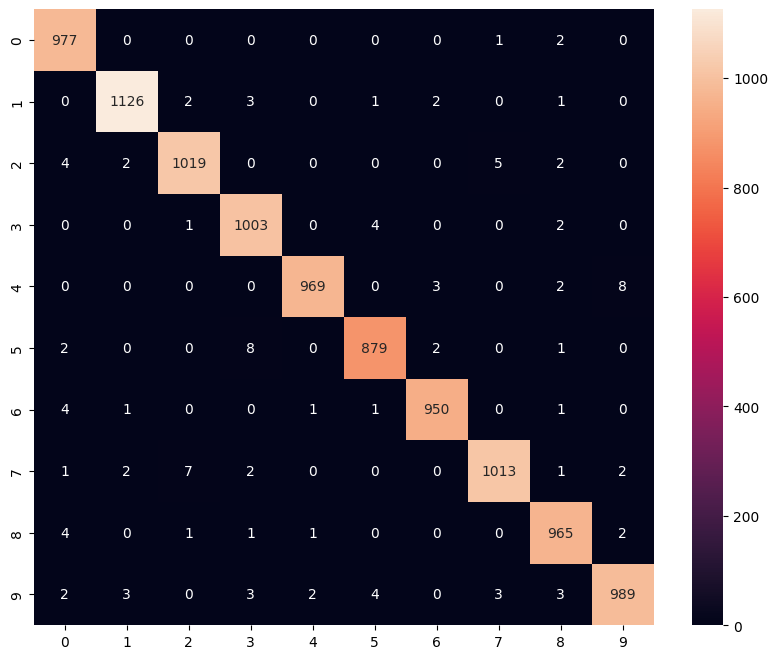

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [19]:
x_test2=np.load('validation_x.npy')
y_test2=np.load('validation_y.npy')

In [20]:
x_test2.shape

(1000, 28, 28)

In [21]:
x_test2=x_test2.reshape(x_test2.shape[0],x_test2.shape[1],x_test2.shape[2],1)
x_test2=x_test2/255.0
y_test2=tf.one_hot(y_test2.astype(np.int32),depth=10)

In [22]:
history_ = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,validation_data=(x_test2,y_test2))

Epoch 1/2
1000/1000 [==============================] - 122s 121ms/step - loss: 0.1453 - acc: 0.9563 - val_loss: 2.3116 - val_acc: 0.0700
Epoch 2/2
1000/1000 [==============================] - 119s 119ms/step - loss: 0.0537 - acc: 0.9840 - val_loss: 2.3144 - val_acc: 0.1200


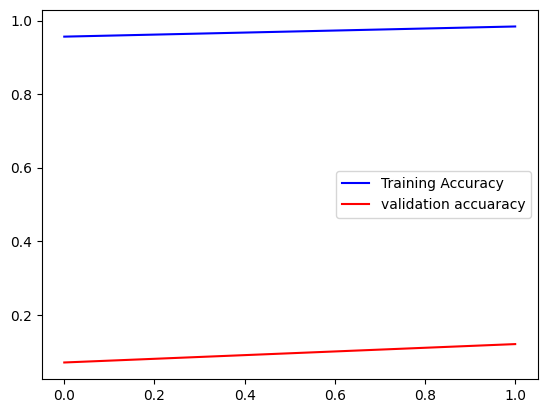

In [29]:
plt.plot(history_.history['acc'],color='b',label='Training Accuracy')
plt.plot(history_.history['val_acc'],color='r',label='validation accuaracy')
plt.legend()

In [23]:
y_pred=model.predict(x_test2)

32/32 [==============================] - 0s 11ms/step


In [25]:
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test2,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

<Axes: >

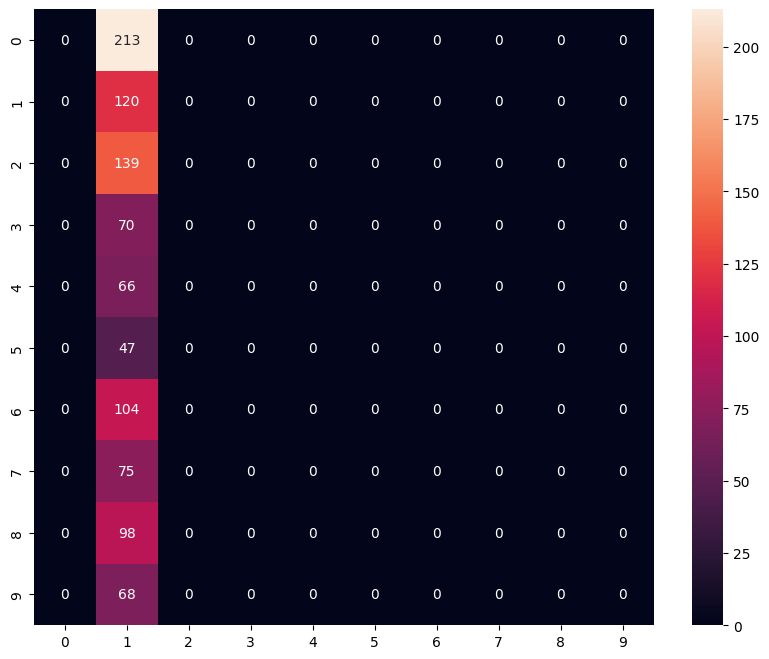

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [18]:
type(x_train)
type(x_test2)

numpy.ndarray